In [5]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.signal as spsig


In [2]:
df_w = pd.read_pickle("./muons_165GeV_angle60_delay725ns_GSPS1p2_8Nov_0249.pkl")
df_w = -(df_w - 0.450)

In [3]:
def fft_pandas(d):
    f_s = 1.2e9
    dt = 1/f_s
    
    size = 1024
        
    ## DFT using numpy routine
    
    x  = np.linspace(0.0,size*dt, size)
    yf = np.fft.fft(d)
    xf = np.fft.fftfreq(size, dt)
    xf = np.fft.fftshift(xf)
    print(xf)
    yplot = np.fft.fftshift(yf)
    ## Power Spectrum
    spectrum = np.abs(yplot)**2
    return spectrum

def ampl(w):
    relmin = spsig.argrelmax(w,order=1024)
    ampl = w[relmin[0]]
    return ampl


In [ ]:
s = df_w.ch6

In [8]:
#s.map(lambda x: ampl(np.array(x)))
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
for ch in df_w.columns:
    if chs_1cm.count(ch):
        print(ch)
        df_w[f"{ch}_ampl"] = df_w[ch].map(lambda x: ampl(np.array(x)))
        df_w[f"{ch}_int"] = df_w[ch].map(lambda x: np.array(x).sum())
        #df_w[f"{ch}_baseline"] = df_w[ch].map(lambda x: x.sum()*0.01)
        df_w[f"{ch}_rms"] = df_w[ch].map(lambda x: np.sqrt(np.square(np.array(x)).mean() - np.square(np.array(x).mean())))

ch4
ch5
ch6
ch7
ch8
ch9


In [101]:
import scipy.signal as spsig
from matplotlib import figure

def plotSigInEvent(eventNumber = 0):
    channel_map_color = {
     "ch0" : "b",
     "ch1" : "b",
     "ch2" : "b",
     "ch3" : "b",
     "ch4" : "black",
     "ch5" : "black",
     "ch6" : "black",
     "ch7" : "black",
     "ch8" : "black",
     "ch9" : "black",
     "ch10" : "maroon",
     "ch11" : "maroon",
     "ch12" : "maroon",
     "ch13" : "darkorange",
     "ch14" : "darkorange",
     "ch15" : "darkorange"
    }
    if (eventNumber > df_w.shape[0]):
        print("Event Number out of range")
        return -90
    fig = figure.Figure(figsize=(24,20))
    axs = fig.subplots(4,4)  #, sharex="all", sharey="all")
    for ch in np.arange(0,15):
        Row = int(ch / 4)
        Column = ch % 4
        ax = axs[Row][Column]
        
        w = np.array(df_w[f"ch{ch}"][eventNumber])
        t = np.linspace(0,8.5e-7,1024)
        w[1:-1]
        
        relmin = spsig.argrelmax(w,order=1022)
        integral = w.sum()
        baseline = integral *0.01
        rms = np.sqrt(np.square(w).mean() - np.square(w.mean()))
        print(ch)
        print(integral)
        print(rms)
        print(w[relmin[0]])
        _ = ax.plot(t,w, channel_map_color[f"ch{ch}"])
        ax.plot(t[relmin[0]],w[relmin[0]],'or')
        ax.set_ylim(-0.05,0.05)
        ax.tick_params(direction='in', length=6, width=1.1, colors='k',
                      grid_color='k', which='major')
        ax.tick_params(direction='in', length=3, width=1, colors='k',
                      grid_color='k', which='minor')
        ax.grid(ls='--',color='grey')

    return fig

0
34.398999023437504
0.021790254570288454
[0.10475464]
1
26.69369201660157
0.009980687745461486
[0.04909058]
2
0.13049011230469887
0.010310679074979893
[0.03755493]
3
30.49377136230469
0.018355243427683392
[0.0838501]
4
-0.20920104980467613
0.001291522391962897
[0.00291748]
5
-0.36406249999998863
0.0013018358302386947
[0.00345154]
6
-0.17660827636717613
0.00135673554060498
[]
7
0.04736022949219887
0.001251583527636868
[0.00534363]
8
0.13181762695313637
0.001360569316612031
[0.00427551]
9
0.08163146972657387
0.00131368718343253
[0.00378723]
10
0.03468017578126137
0.0017966469625213407
[0.00503845]
11
0.05903320312501137
0.0016199466986814974
[]
12
0.08602600097657387
0.0016425017969571485
[0.00583191]
13
9.631848144531258
0.021740903925586027
[0.13534851]
14
12.240231323242195
0.022531619867847654
[0.12497253]


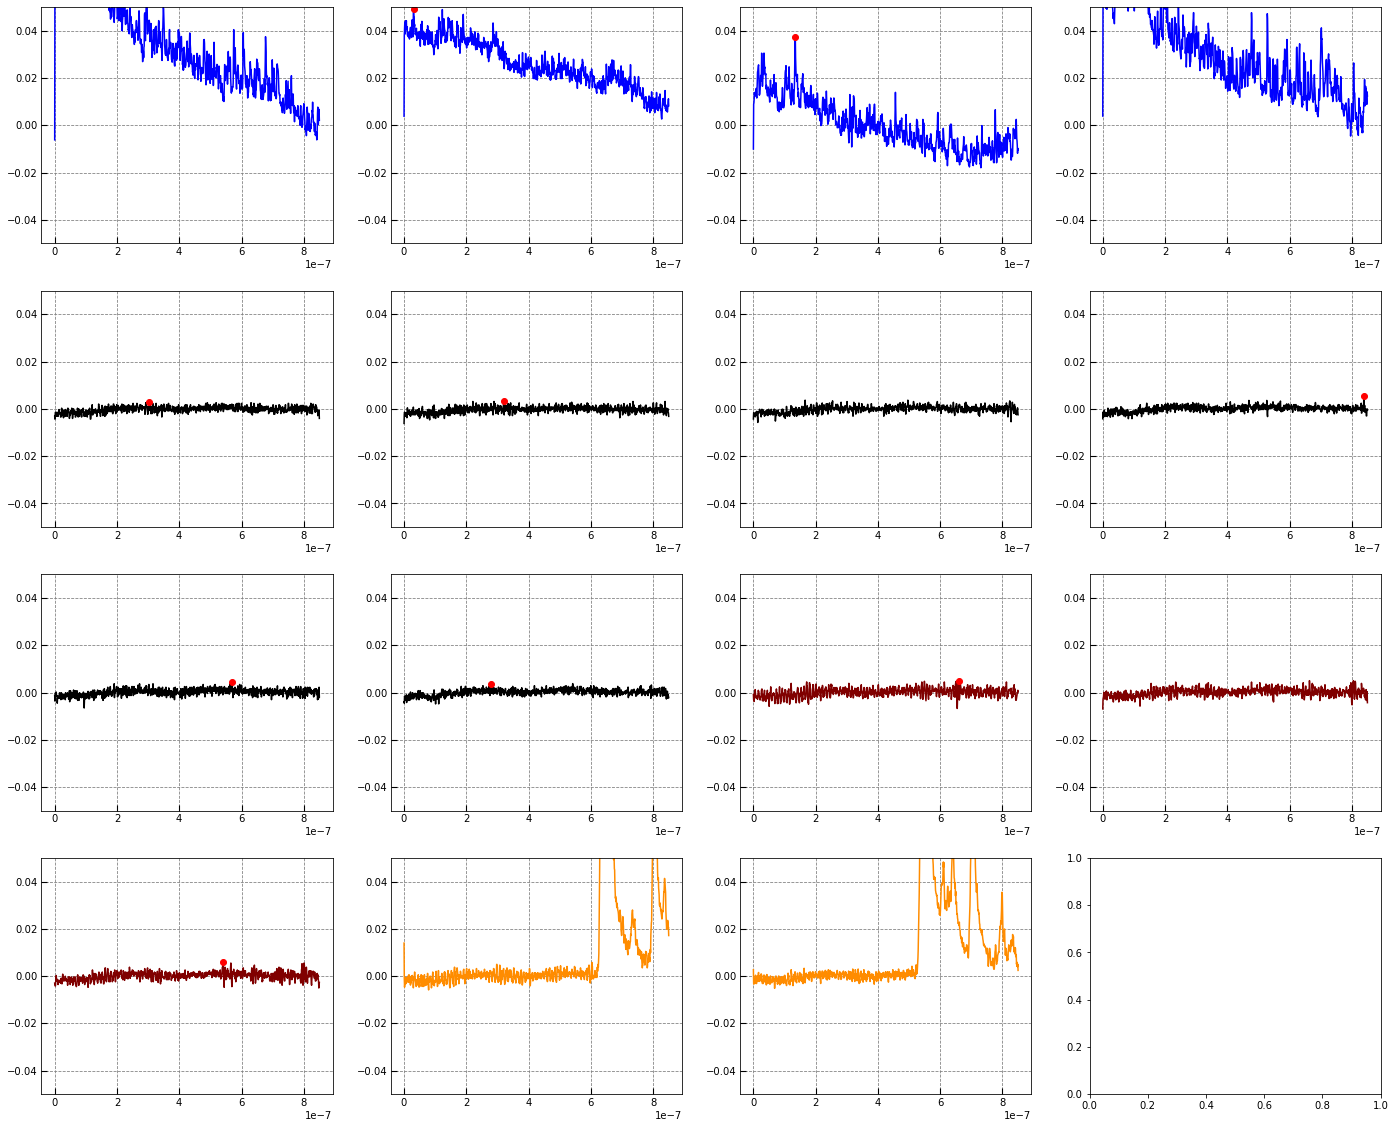

In [102]:
plotSigInEvent(5)

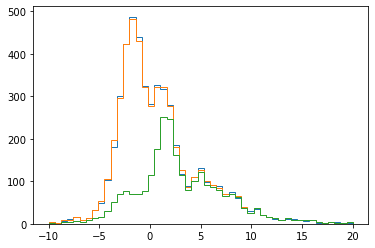

In [48]:
ampl_mask = df_w.ch6_ampl > 5e-3
plt.hist(df_w.ch6_int.to_numpy() - df_w.ch6_int.to_numpy()*0.01, histtype="step", bins=np.linspace(-10,20,50));
plt.hist(df_w.ch6_int.to_numpy(), histtype="step", bins=np.linspace(-10,20,50));
plt.hist(df_w.ch6_int.to_numpy()[ampl_mask], histtype="step", bins=np.linspace(-10,20,50));
#plt.hist(df_w.ch6_int.to_numpy()*0.01, histtype="step", bins=np.linspace(-10,20,50), log=True);

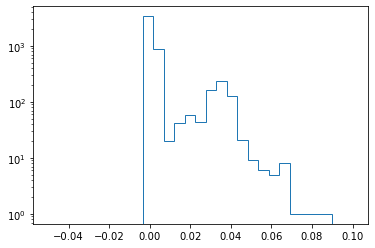

In [58]:
plt.hist(df_w.ch6_rms.to_numpy(), bins=np.linspace(-0.05,0.1,30), histtype="step", log=True);

5000 5000
ch4 0
682 5000
5000 5000
ch5 1
485 5000
5000 5000
ch6 2
713 5000
5000 5000
ch7 3
727 5000
5000 5000
ch8 4
663 5000
5000 5000
ch9 5
635 5000


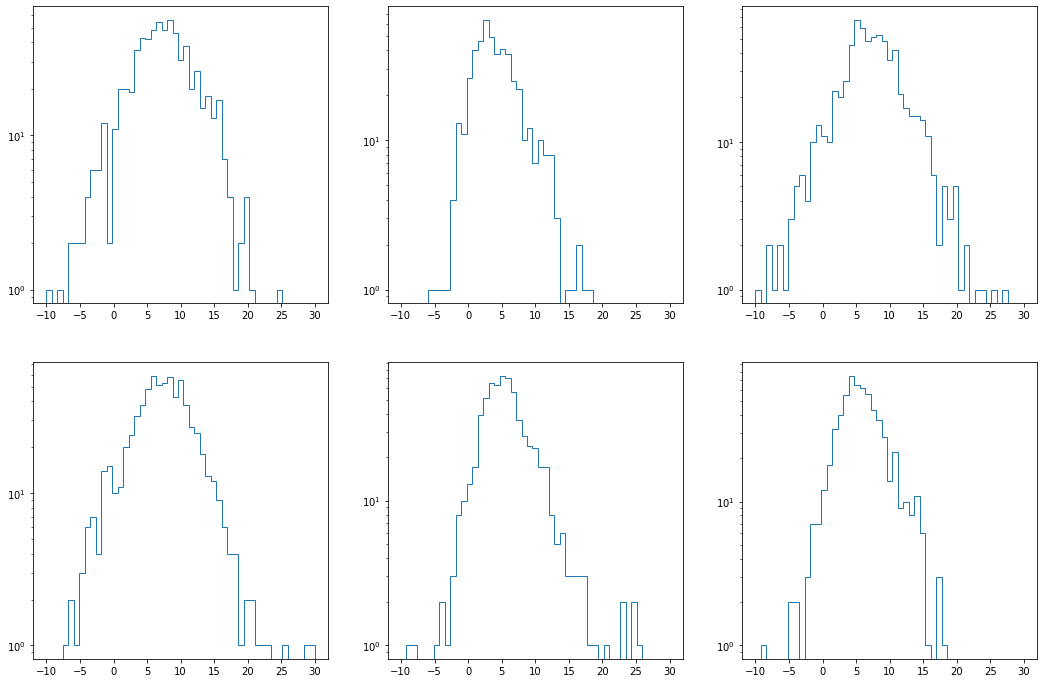

In [179]:
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
chs_3cm = ["ch13", "ch14"]
chs_2cm = ["ch10", "ch11", "ch12"]

fig = plt.figure(figsize=(18,12))
axs = fig.subplots(2,3)  #, sharex="all", sharey="all")

for num, ch in enumerate(chs_1cm):
    Row = int(num / 3)
    Column = num % 3
    ax = axs[Row][Column]
    
    mask_baseline = df_w[ch].map(lambda x: np.array(x[1:-1]).max()) > 0.1
    df_series_max = df_w[ch].map(lambda x: np.array(x[1:-1]).max())
    int_ch = df_w[ch].map(lambda x: np.array(x[1:-1]).sum())
    print(len(mask_baseline), len(int_ch))
    #ax.hist(df_series_max, bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(df_series_max[mask_baseline], bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    ax.hist(int_ch[mask_baseline], histtype="step", bins=np.linspace(-10,30,50), log=True);
    print(ch, num)
    print(len(df_series_max[mask_baseline]), len(df_series_max))
plt.show()

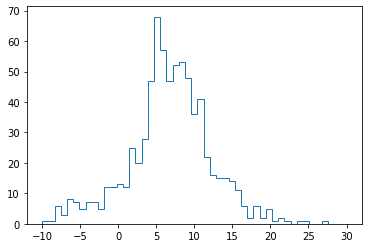

In [119]:
plt.hist(df_w.ch6_int.to_numpy()[mask_baseline], histtype="step", bins=np.linspace(-10,30,50));


In [78]:
df_w.ch6_ampl.to_numpy(na_value=np.array([0]))

array([array([], dtype=float64), array([0.00279541]), array([0.01196594]),
       ..., array([0.00870056]), array([], dtype=float64),
       array([0.00545044])], dtype=object)

In [107]:
def ampl(w):
    relmin = spsig.argrelmax(w,order=800, mode="clip")
    ampl = w[relmin[0]]
    return ampl


In [111]:
df_w.ch6[:10].map(lambda x: ampl(np.array(x[10:-10])))
df_w.ch6[:10].map(lambda x: np.array(x[10:-10]).max())

0    0.002811
1    0.002795
2    0.011966
3    0.002216
4    0.005725
5    0.003696
6    0.004276
7    0.279590
8    0.005771
9    0.005161
Name: ch6, dtype: float64

In [151]:
df_w_noise = pd.read_pickle("./Noise/08Nov2021_noiseRun_HV500_cosmincs_carroponte_on.pkl")
df_w_noise = -(df_w_noise-0.450)

500 500
ch4 0
69 500
500 500
ch5 1
25 500
500 500
ch6 2
24 500
500 500
ch7 3
39 500
500 500
ch8 4
40 500
500 500
ch9 5
51 500


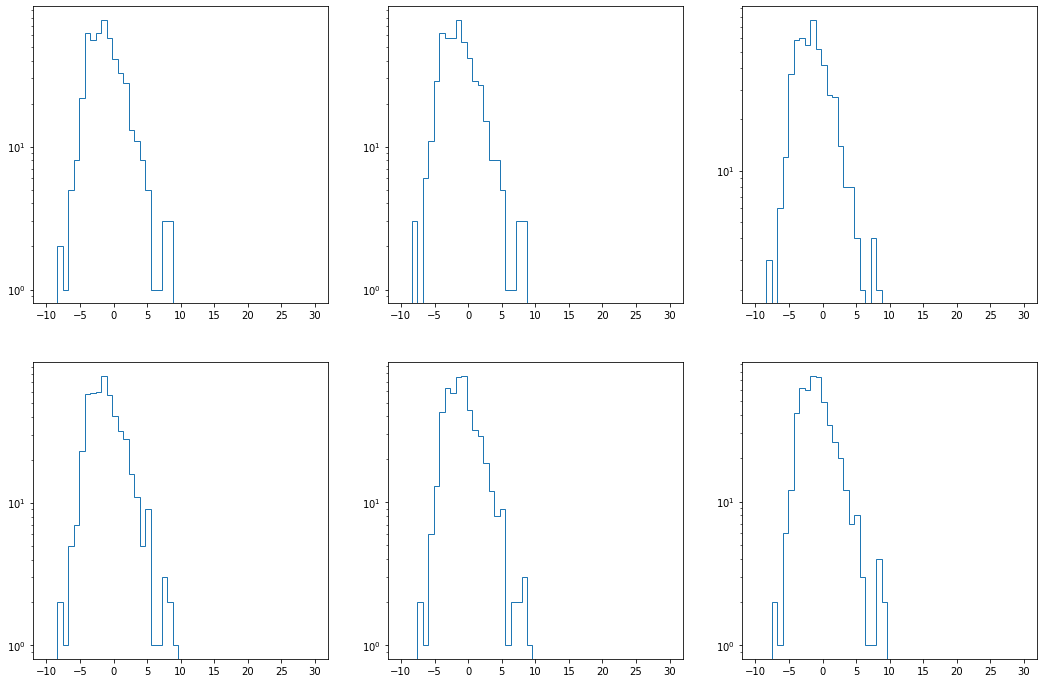

In [178]:
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
chs_3cm = ["ch13", "ch14"]
chs_2cm = ["ch10", "ch11", "ch12"]

fig = plt.figure(figsize=(18,12))
axs = fig.subplots(2,3)  #, sharex="all", sharey="all")

for num, ch in enumerate(chs_1cm):
    Row = int(num / 3)
    Column = num % 3
    ax = axs[Row][Column]
    
    mask_baseline = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).max()) > 0.01
    df_series_max = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).max())
    int_ch = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).sum())
    print(len(mask_baseline), len(int_ch))
    #ax.hist(df_series_max, bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(df_series_max[mask_baseline], bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    print(ch, num)
    print(len(df_series_max[mask_baseline]), len(df_series_max))
plt.show()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 396.,  89.,
          9.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.1       , -0.08947368, -0.07894737, -0.06842105, -0.05789474,
        -0.04736842, -0.03684211, -0.02631579, -0.01578947, -0.00526316,
         0.00526316,  0.01578947,  0.02631579,  0.03684211,  0.04736842,
         0.05789474,  0.06842105,  0.07894737,  0.08947368,  0.1       ]),
 [<matplotlib.patches.Polygon at 0x7f02def3f730>])

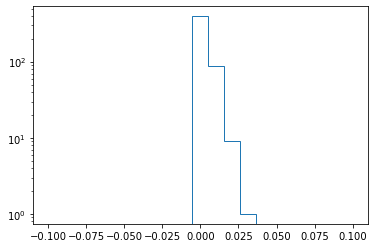

In [157]:
int_noise = df_w_noise.ch6.sum()
df_noise_max = df_w_noise.ch6.map(lambda x: np.array(x[1:-1]).max())
plt.hist(df_noise_max, histtype="step", bins=np.linspace(-0.1,0.1,20), log=True)

In [150]:
df_w_noise.ch6

0      [-0.451904296875, -0.453399658203125, -0.45014...
1      [-0.45782470703125, -0.454559326171875, -0.455...
2      [-0.4528045654296875, -0.4560394287109375, -0....
3      [-0.4554595947265625, -0.45574951171875, -0.45...
4      [-0.4516143798828125, -0.4483795166015625, -0....
                             ...                        
495    [-0.459014892578125, -0.4545745849609375, -0.4...
496    [-0.4554443359375, -0.4524993896484375, -0.452...
497    [-0.451629638671875, -0.4501495361328125, -0.4...
498    [-0.4578399658203125, -0.4560394287109375, -0....
499    [-0.4524993896484375, -0.452789306640625, -0.4...
Name: ch6, Length: 500, dtype: object